# Netflix Titles Dataset analysis

### Import libraries

In [692]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Without it the date parsing might fail if the locale is not set correctly
import locale
import calendar
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

'en_US.UTF-8'

## Load and clean the dataset

In [693]:
df = pd.read_csv('../data/netflix_titles.csv')
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [694]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [695]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [696]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

### Check for duplicates

In [697]:
df.duplicated().sum()

np.int64(0)

### Chech for null values and handle

In [698]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<Axes: >

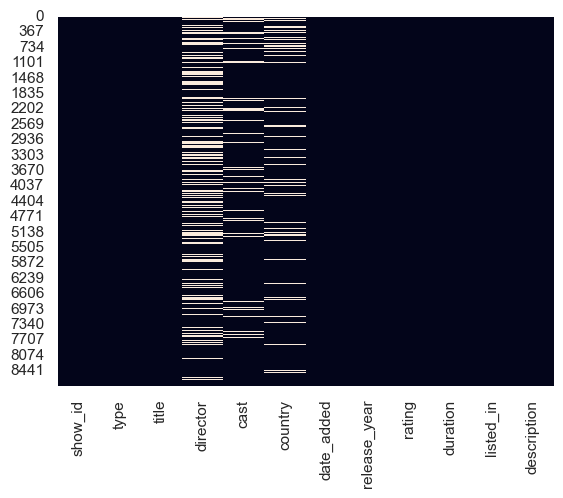

In [699]:
sns.heatmap(df.isnull(), cbar=False)

In [700]:
df.director = df.director.fillna('Unknown')
df.cast = df.cast.fillna('No Cast')
df.country = df.country.fillna(df.country.mode()[0])
df = df.dropna(subset=['date_added'])
df.duration = df.duration.fillna(df.duration.mode()[0])
df.rating = df.rating.ffill()

df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

### Handling datetime

In [701]:
df.date_added = df.date_added.str.strip().str.title()
df.date_added = pd.to_datetime(df.date_added, format='%B %d, %Y', errors='raise')
df.head(10)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,No Cast,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [702]:
df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

### Splitting the dataset into movies and TV series separately

In [703]:
df_movies = df[df['type'] == 'Movie'].copy().reset_index(drop=True)
df_tv_series = df[df['type'] == 'TV Show'].copy().reset_index(drop=True)
df_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
3,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
4,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
6126,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
6127,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
6128,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
6129,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


#### Fixing duration
In TV series duration will be intigers in season number, and in movies minutes

Chcecking whether every value in both columns is in the correct format

In [704]:
hist_movies_duration = df_movies.groupby('duration').size().reset_index(name='count')
hist_movies_duration

,duration,count
0,1 Season,3
1,10 min,1
2,100 min,108
3,101 min,116
4,102 min,122
...,...,...
201,95 min,137
202,96 min,130
203,97 min,146
204,98 min,120


In [705]:
hist_tv_series_duration = df_tv_series.groupby('duration').size().reset_index(name='count')
hist_tv_series_duration

,duration,count
0,1 Season,1793
1,10 Seasons,6
2,11 Seasons,1
3,12 Seasons,2
4,13 Seasons,2
5,15 Seasons,2
6,17 Seasons,1
7,2 Seasons,421
8,3 Seasons,198
9,4 Seasons,94


In [706]:
pattern_movies = r'^\d+\smin$'
df_movies = df_movies[df_movies['duration'].str.match(pattern_movies)]
hist_movies_duration = df_movies.groupby('duration').size().reset_index(name='count')
hist_movies_duration

,duration,count
0,10 min,1
1,100 min,108
2,101 min,116
3,102 min,122
4,103 min,114
...,...,...
200,95 min,137
201,96 min,130
202,97 min,146
203,98 min,120


In [707]:
pattern_tv_series = r'^\d+\s?(Season|Seasons)$'
df_tv_series = df_tv_series[df_tv_series['duration'].str.match(pattern_tv_series)]
hist_tv_series_duration = df_tv_series.groupby('duration').size().reset_index(name='count')
hist_tv_series_duration

,duration,count
0,1 Season,1793
1,10 Seasons,6
2,11 Seasons,1
3,12 Seasons,2
4,13 Seasons,2
5,15 Seasons,2
6,17 Seasons,1
7,2 Seasons,421
8,3 Seasons,198
9,4 Seasons,94


In [708]:
df_movies.loc[:, 'duration'] = df_movies.duration.str.replace('min', '').astype(int)
df_tv_series.loc[:, 'duration'] = df_tv_series.duration.str.replace('Seasons', '').str.replace('Season', '').astype(int)

df_movies = df_movies.rename(columns={'duration' : 'minutes'})
df_tv_series = df_tv_series.rename(columns={'duration' : 'seasons'})

## Analysis

#### Settings

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

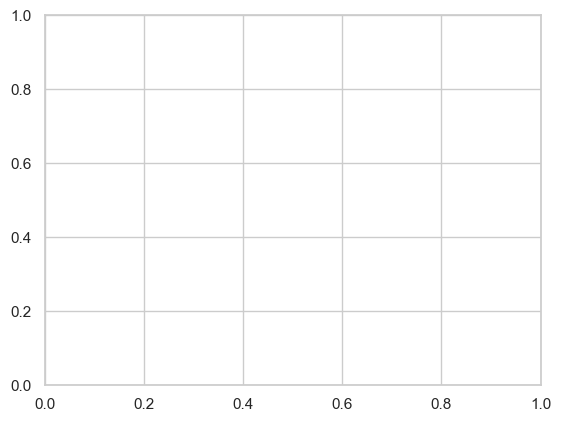

In [709]:
sns.set(style='whitegrid')
plt.xticks(rotation=0)

#### Films vs TV Series

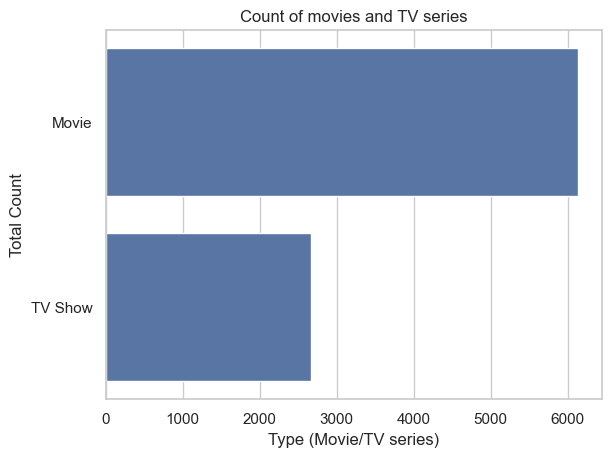

In [710]:
plt.title('Count of movies and TV series')
plt.xlabel('Type (Movie/TV series)')
plt.ylabel('Total Count')
sns.countplot(data = df.type)
plt.show()

([<matplotlib.patches.Wedge at 0x26bfd4096d0>,
 [Text(-0.6379851435134204, 0.8960886991007979, 'Movie'),
  Text(0.6379850082077839, -0.8960887954338643, 'TV Show')],
 [Text(-0.3479918964618656, 0.48877565405498063, '69.7%'),
  Text(0.3479918226587912, -0.4887757066002896, '30.3%')])

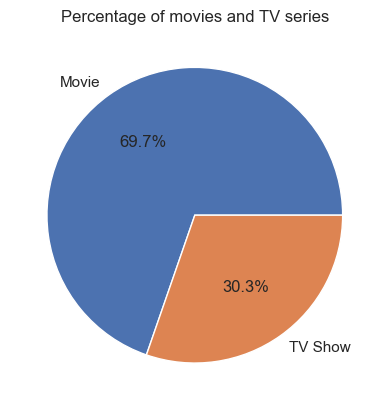

In [711]:
perc = df.type.value_counts()
plt.title('Percentage of movies and TV series')
plt.pie(x=perc, labels=perc.index, autopct='%1.1f%%')

#### Netflix Movie & TV Series ratings

<Axes: title={'center': 'Netflix Movie & TV Series ratings'}, xlabel='Rating', ylabel='Total count'>

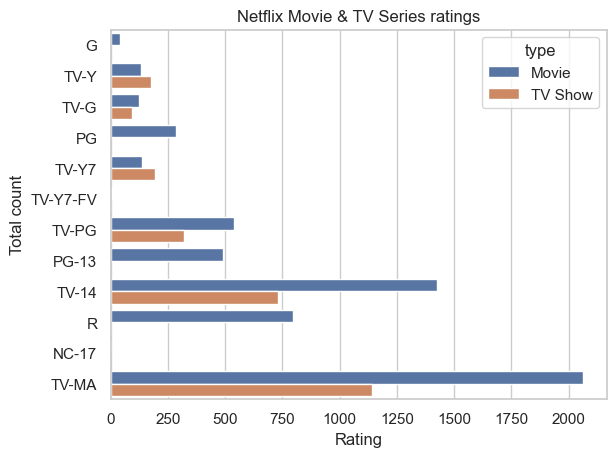

In [712]:
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.title('Netflix Movie & TV Series ratings')
plt.xlabel('Rating')
plt.ylabel('Total count')

sns.countplot(df, y='rating', hue='type', order=order)

<Axes: title={'center': 'Content added each year'}, xlabel='Year', ylabel='Releases'>

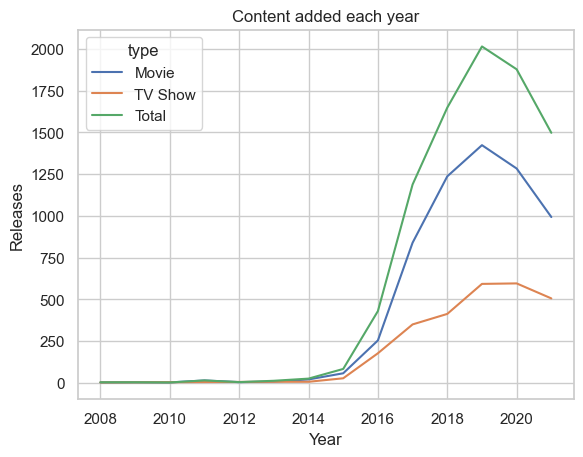

In [713]:
df['year_added'] = df.date_added.dt.year
df_year_added = df.groupby(['year_added', 'type']).size().reset_index(name='count')
df_total = df_year_added.groupby('year_added')['count'].sum().reset_index(name='count')
df_total['type'] = 'Total'
df_year_added = pd.concat([df_year_added, df_total])

plt.title('Content added each year')
plt.xlabel('Year')
plt.ylabel('Releases')
sns.lineplot(data=df_year_added, x='year_added', y='count', hue='type')

Text(0.5, 20.049999999999997, 'Year')

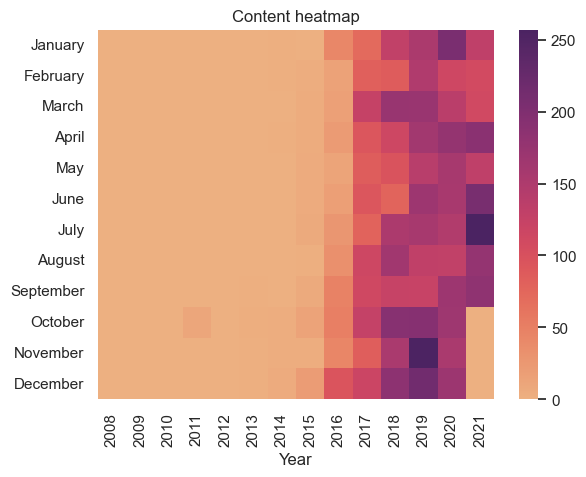

In [714]:
df['month_added'] = df.date_added.dt.month
df_month_year = df.groupby(by=['year_added', 'month_added']).size().reset_index(name='count')
df_month_year = df_month_year.pivot(index='month_added', columns='year_added', values='count')
df_month_year = df_month_year.fillna(0).astype(int)
df_month_year.index = [calendar.month_name[i].title() for i in df_month_year.index]
sns.heatmap(df_month_year, cmap='flare')
plt.title('Content heatmap')
plt.xlabel('Year')

### Netflix movie duration

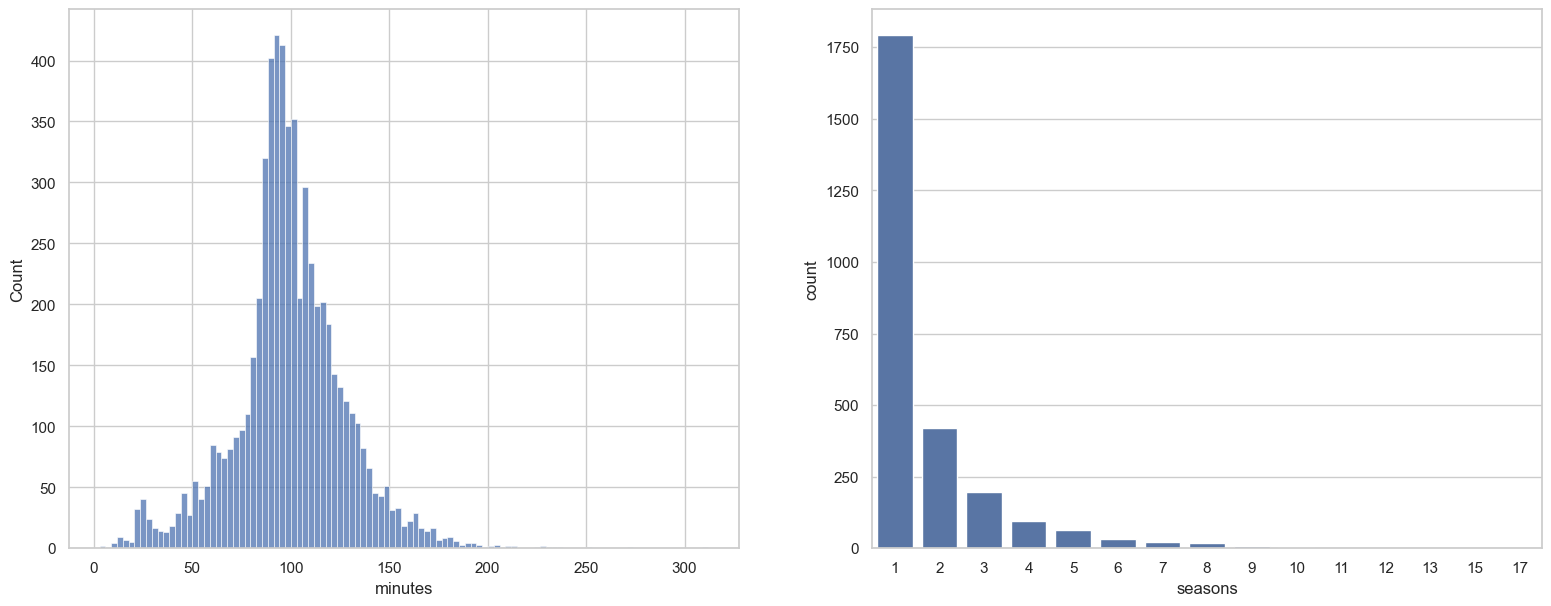

In [723]:
fig, ax = plt.subplots(1,2, figsize=(19,7))
d1 = sns.histplot(df_movies.minutes, ax=ax[0])
d2 = sns.countplot(df_tv_series, x='seasons', ax=ax[1])


#### Countries with the most content available

<Axes: xlabel='count', ylabel='country'>

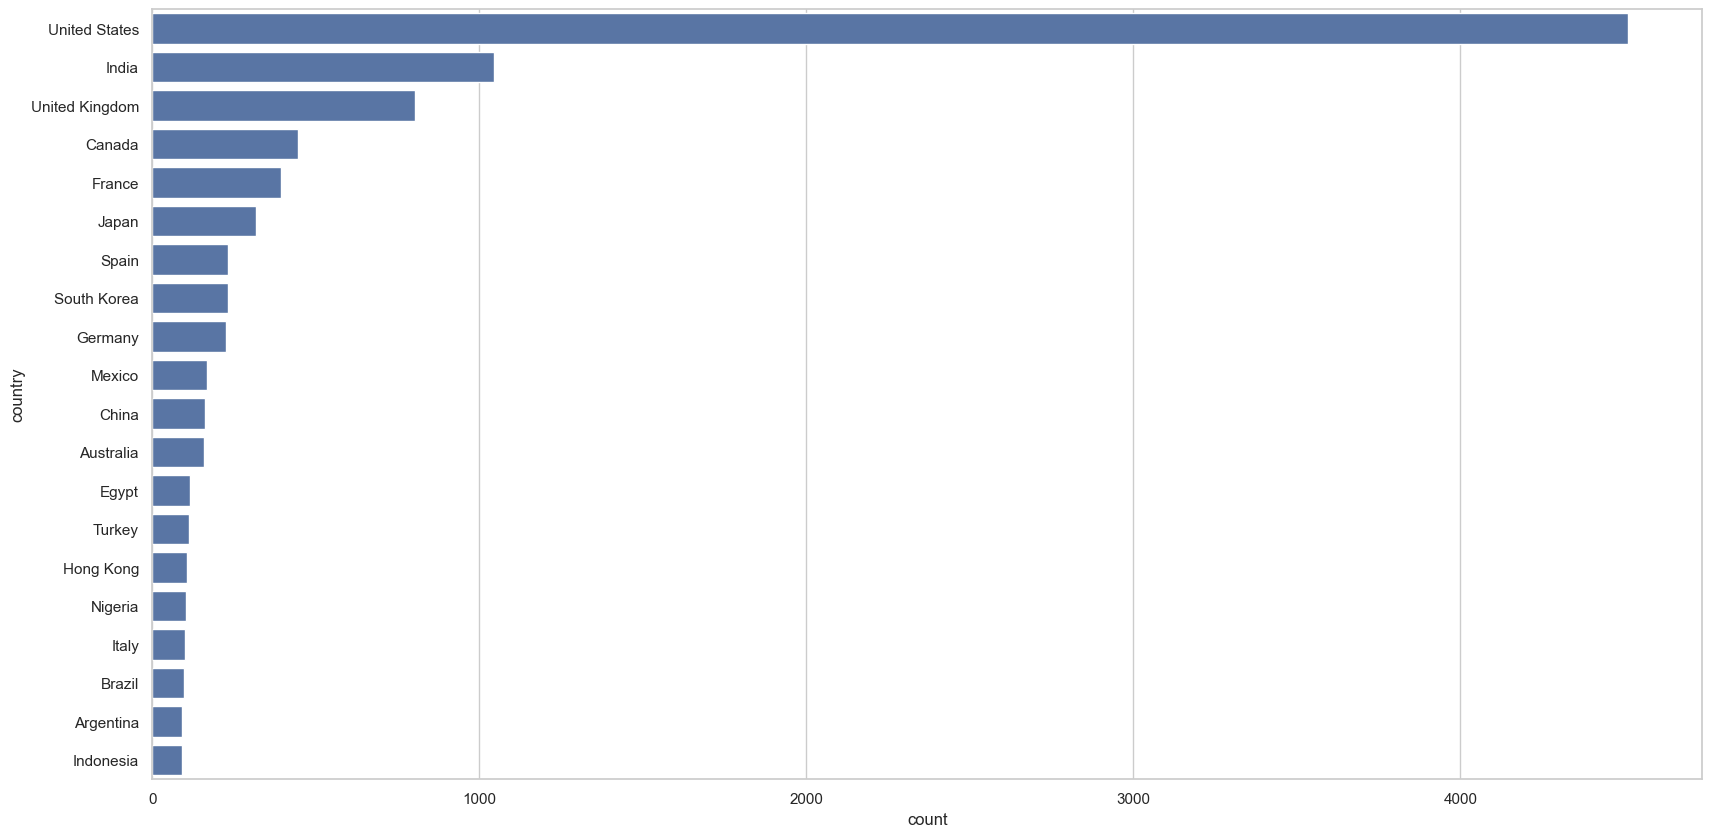

In [756]:
n = 20
plt.figure(figsize=(20,10))
df_countries = df.country.str.split(',', expand=True).stack().str.strip().reset_index(drop=True)
df_countries = df_countries[df_countries != '']
df_countries = df_countries.value_counts().reset_index().sort_values(by='count', ascending=False)
df_countries = df_countries.rename(columns={'index' : 'country'})
df_top_countries = df_countries.head(n)
sns.barplot(data=df_top_countries, y='country', x='count')